In [98]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [84]:
comp = pd.read_csv('Housing_Maintenance_Code_Complaints.csv')
prob = pd.read_csv('Complaint_Problems.csv')
bbl = pd.read_csv('pluto.csv')

In [73]:
print "  these are the complains columns:", comp.columns
                                            

print "  these are the problems columns:", prob.columns

  these are the complains columns: Index([u'ComplaintID', u'BuildingID', u'BoroughID', u'Borough', u'HouseNumber',
       u'StreetName', u'Zip', u'Block', u'Lot', u'Apartment',
       u'CommunityBoard', u'ReceivedDate', u'StatusID', u'Status',
       u'StatusDate'],
      dtype='object')
  these are the problems columns: Index([u'ProblemID', u'ComplaintID', u'UnitTypeID', u'UnitType',
       u'SpaceTypeID ', u'SpaceType', u'TypeID', u'Type', u'MajorCategoryID',
       u'MajorCategory', u'MinorCategoryID', u'MinorCategory', u'CodeID',
       u'Code', u'StatusID', u'Status', u'StatusDate', u'StatusDescription'],
      dtype='object')


In [74]:
print " number of problems:",len(prob)
print " number of complaints:", len(comp)

 number of problems: 2057764
 number of complaints: 1114739


### borough key: 
MN = 1 
BX = 2
BK = 3
QN = 4
SI = 5




In [96]:
# total nuimber of complaints per borough
print "MN complaints", len(comp[comp['BoroughID']== 1])
print "BX complaints", len(comp[comp['BoroughID']== 2])
print "BK complaints", len(comp[comp['BoroughID']== 3])
print "QN complaints", len(comp[comp['BoroughID']== 4])
print "SI complaints", len(comp[comp['BoroughID']== 5])

MN complaints 252310
BX complaints 343269
BK complaints 358524
QN complaints 144949
SI complaints 15687


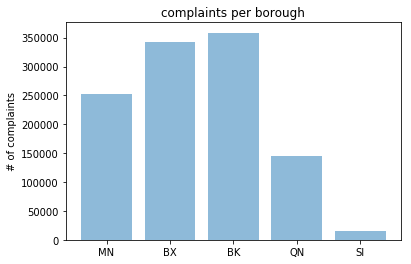

In [101]:
#ploting complaints per boroughs
borough = ('MN', 'BX', 'BK', 'QN', 'SI')
y_pos = np.arange(len(borough))
complaints = [252310,343269,358524,144949,15687]

plt.bar(y_pos, complaints, align='center', alpha=0.5)
plt.xticks(y_pos, borough)
plt.ylabel('# of complaints')
plt.title('complaints per borough')
 
plt.show()

In [77]:
comp.head(10)

,ComplaintID,BuildingID,BoroughID,Borough,HouseNumber,StreetName,Zip,Block,Lot,Apartment,CommunityBoard,ReceivedDate,StatusID,Status,StatusDate
0,6960137,3418,1,MANHATTAN,1989,ADAM C POWELL BOULEVARD,10026.0,1904,4,12D,10,07/07/2014,2,CLOSE,07/29/2014
1,6960832,3512,1,MANHATTAN,2267,ADAM C POWELL BOULEVARD,10030.0,1918,4,3B,10,07/08/2014,2,CLOSE,07/12/2014
2,6946867,5318,1,MANHATTAN,778,11 AVENUE,10019.0,1083,1,4P,4,06/19/2014,2,CLOSE,07/13/2014
3,6966946,5608,1,MANHATTAN,1640,AMSTERDAM AVENUE,10031.0,2073,29,5A,9,07/16/2014,2,CLOSE,07/21/2014
4,6956574,17896,1,MANHATTAN,230,EAST 88 STREET,10128.0,1533,32,1E,8,07/01/2014,2,CLOSE,07/09/2014
5,6959035,19899,1,MANHATTAN,428,EAST 117 STREET,10035.0,1710,36,3D,11,07/04/2014,2,CLOSE,07/10/2014
6,6924412,25304,1,MANHATTAN,498,MANHATTAN AVENUE,10027.0,1947,47,4,10,05/21/2014,2,CLOSE,07/04/2014
7,6944891,32017,1,MANHATTAN,351,WEST 29 STREET,10001.0,753,10,25,4,06/17/2014,2,CLOSE,07/22/2014
8,6961276,37344,1,MANHATTAN,209,WEST 101 STREET,10025.0,1873,24,PH,7,07/08/2014,2,CLOSE,07/11/2014
9,6959795,41208,1,MANHATTAN,315,WEST 138 STREET,10030.0,2041,40,6,10,07/07/2014,2,CLOSE,07/16/2014


In [83]:
# in order to validate my method of getting BBL's I manually looked up a few of the addresses
#here http://nycprop.nyc.gov/nycproperty/nynav/jsp/stmtassesslst.jsp 
#conclusion: BoroughID/ Block/ Lot

In [85]:
bbl

,the_geom,bbl
0,0106000020E61000000100000001030000000100000004...,3015870001
1,0106000020E61000000100000001030000000100000005...,1000190008
2,0106000020E61000000100000001030000000100000005...,1001527501
3,0106000020E61000000100000001030000000100000005...,3009200052
4,0106000020E61000000100000001030000000100000004...,3003820016
5,0106000020E61000000100000001030000000100000005...,3008880062
6,0106000020E61000000100000001030000000100000005...,3010967501
7,0106000020E61000000100000001030000000100000005...,3010020019
8,0106000020E61000000100000001030000000100000005...,3004570062
9,0106000020E61000000100000001030000000100000005...,3010170010
